In [ ]:
import tensorflow_hub as hub

In [7]:
# import tensorflow as tf
import nltk

In [3]:
import pandas as pd
import sklearn

In [4]:
import numpy as np
import seaborn as sns

In [5]:
import string

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kjaga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjaga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


**Loading the data**



In [100]:
data_df = pd.read_csv('processed.csv',header = 0)

In [101]:
data_df.columns

Index(['wiki_id', 'title_goog', 'title_cmu', 'key', 'publisher', 'rating',
       'num_ratings', 'summary_cmu', 'summary_goog', 'genre'],
      dtype='object')

In [143]:
from collections import Counter, defaultdict
import json


data_df = pd.read_csv('processed.csv',header = 0)


genre_count = Counter()
book_to_genre = defaultdict(set)
for row in data_df.to_dict('records'):
    entry = row['genre']
    if not isinstance(entry, str):
        continue
    temp_one = entry.replace("'s", "").replace("'", '"').replace('/','')
    temp = json.loads(temp_one)
    book_to_genre[row['title_cmu']].update(list(temp.values()))
    for val in temp.values():
        genre_count[val]+=1

genre_freq = list(genre_count.items())
genre_freq.sort(key = lambda x: x[1], reverse=True)
top_genres = [pair[0] for pair in genre_freq[:15]]


new_df = pd.DataFrame()
new_df['title'] = data_df['title_cmu'].unique()

for genre in top_genres:
    new_df[genre] = 0

new_df['other_genre'] = 0


i = -1
for row in new_df.to_dict('records'):
    i+=1
    title = row['title']
    for genre in book_to_genre[title]:
        if genre in top_genres:
            new_df.at[i, genre] = 1
        else:
            new_df.at[i, 'other_genre'] = 1

print(new_df)

                                           title  Fiction  \
0                                    Animal Farm        1   
1                             A Clockwork Orange        1   
2                                     The Plague        1   
3      An Enquiry Concerning Human Understanding        0   
4                           A Fire Upon the Deep        1   
...                                          ...      ...   
11307                                  Suspicion        0   
11308                        Who Killed Zebedee?        0   
11309                              Charon's Claw        0   
11310                              The Last Girl        1   
11311                     The Democratic Paradox        0   

       Speculative fiction  Science Fiction  Fantasy  Novel  \
0                        1                0        0      0   
1                        1                1        0      0   
2                        0                0        0      1   
3              

In [131]:
from collections import Counter, defaultdict
import json

data_df = pd.read_csv('processed.csv',header = 0)

publisher_count = Counter()
book_to_publishers = defaultdict(set)
for row in data_df.to_dict('records'):
    book_to_publishers[row['title_cmu']].add(row['publisher'])
    entry = row['publisher']
    publisher_count[entry]+=1


publisher_freq = list(publisher_count.items())
publisher_freq.sort(key = lambda x: x[1], reverse=True)
top_publishers = [pair[0] for pair in publisher_freq[:15]]

new_df = pd.DataFrame()
new_df['title'] = data_df['title_cmu'].unique()

for pub in top_publishers:
    new_df[pub] = 0

new_df['other_publisher'] = 0


i = -1
for row in new_df.to_dict('records'):
    i+=1
    title = row['title']
    
    for pub in book_to_publishers[title]:
        if pub in top_publishers:
            new_df.at[i,pub] = 1
        else:
            new_df.at[i,'other_publisher'] = 1
        


print(new_df)

                                           title  Penguin  Simon and Schuster  \
0                                    Animal Farm        0                   0   
1                             A Clockwork Orange        0                   0   
2                                     The Plague        0                   1   
3      An Enquiry Concerning Human Understanding        0                   0   
4                           A Fire Upon the Deep        0                   0   
...                                          ...      ...                 ...   
11307                                  Suspicion        0                   0   
11308                        Who Killed Zebedee?        0                   0   
11309                              Charon's Claw        0                   0   
11310                              The Last Girl        0                   0   
11311                     The Democratic Paradox        0                   0   

       Harper Collins  Macm

In [128]:
data_df = pd.read_csv('processed.csv',header = 0)

new_df = pd.DataFrame()
new_df['title'] = data_df['title_cmu'].unique()
print(new_df)

                                           title
0                                    Animal Farm
1                             A Clockwork Orange
2                                     The Plague
3      An Enquiry Concerning Human Understanding
4                           A Fire Upon the Deep
...                                          ...
11307                                  Suspicion
11308                        Who Killed Zebedee?
11309                              Charon's Claw
11310                              The Last Girl
11311                     The Democratic Paradox

[11312 rows x 1 columns]


In [ ]:
cmu_summaries['cleaned'] = cmu_summaries['summary_cmu'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [ ]:
def remove_punc(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

In [ ]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda summary: [remove_punc(w) for w in summary])

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda tweet: [w for w in tweet if w.lower() not in stop_words])

In [ ]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda tweet: [w.lower() for w in tweet])


In [ ]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer 
ps = PorterStemmer()

In [26]:
cmu_summaries.head()

,title_cmu,summary_cmu,cleaned
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...","[old, major, , old, boar, manor, farm, , calls..."
7,A Clockwork Orange,"Alex, a teenager living in near-future Englan...","[alex, , teenager, living, nearfuture, england..."
12,The Plague,The text of The Plague is divided into five p...,"[text, plague, divided, five, parts, , town, o..."
16,An Enquiry Concerning Human Understanding,The argument of the Enquiry proceeds by a ser...,"[argument, enquiry, proceeds, series, incremen..."
17,A Fire Upon the Deep,The novel posits that space around the Milky ...,"[novel, posits, space, around, milky, way, div..."


In [ ]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda tweet: [lemmatizer.lemmatize(w) for w in tweet ])

In [27]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda tweet: [ps.stem(w) for w in tweet ])

In [33]:
cmu_summaries['cleaned'] = cmu_summaries.cleaned.apply(lambda tweet: ' '.join(tweet))

In [34]:
cmu_summaries.head()

,title_cmu,summary_cmu,cleaned
0,Animal Farm,"Old Major, the old boar on the Manor Farm, ca...",old major old boar manor farm call anim farm...
7,A Clockwork Orange,"Alex, a teenager living in near-future Englan...",alex teenag live nearfutur england lead gang...
12,The Plague,The text of The Plague is divided into five p...,text plagu divid five part town oran thousan...
16,An Enquiry Concerning Human Understanding,The argument of the Enquiry proceeds by a ser...,argument enquiri proce seri increment step se...
17,A Fire Upon the Deep,The novel posits that space around the Milky ...,novel posit space around milki way divid conce...


In [35]:
# all_unique_summaries = cmu_summaries['summary_cmu']

In [36]:
# all_unique_summaries


In [37]:
# len(cmu_summaries.summary_cmu.unique())/len(cmu_summaries.summary_cmu)

In [38]:
# one_summary = all_unique_summaries[0]

In [39]:
list_all_summaries = cmu_summaries['cleaned'].tolist()

In [40]:
len(list_all_summaries)

11312

# New Section

In [41]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)

In [63]:
df_embed = cmu_summaries[["title_cmu", "cleaned"]].drop_duplicates()

In [64]:
df_embed["encoding"] = df_embed.cleaned.apply(lambda x : model([x]).numpy())

In [65]:
df_embed["encoding"] = df_embed.encoding.apply(lambda x : x.reshape(-1))

In [ ]:
# df_embed.encoding.iloc[0].reshape(-1).shape

(512,)

In [61]:
df_embed = df_embed.drop(columns=["cleaned"])

In [66]:
df_embed.to_parquet("./encoding2_cleaned_summaries.parquet")

In [42]:
summary_embedding = [model([x]) for x in list_all_summaries]

In [43]:
embedding_list_tensor = tf.concat(summary_embedding,axis = 0)

In [44]:
embedding_list_tensor.shape

TensorShape([11312, 512])

In [45]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [46]:
embedding_list_tensor[:10]

<tf.Tensor: shape=(10, 512), dtype=float32, numpy=
array([[ 0.03993112, -0.04536719, -0.01010615, ..., -0.04536719,
        -0.04536719,  0.04536703],
       [ 0.04523629, -0.04591964, -0.04587054, ..., -0.04591964,
        -0.04591946, -0.04591006],
       [ 0.03912394, -0.04686896, -0.04685051, ..., -0.04686892,
        -0.0468669 , -0.00934443],
       ...,
       [ 0.04843707, -0.04843888, -0.04837332, ..., -0.04834193,
         0.04813344,  0.00518251],
       [ 0.02700822, -0.03594228, -0.01120591, ...,  0.01917521,
         0.08372778, -0.03007337],
       [-0.02207264, -0.05643287,  0.0358031 , ...,  0.05272576,
         0.05815875,  0.01055826]], dtype=float32)>

In [47]:
book_names = cmu_summaries['title_cmu'].tolist()

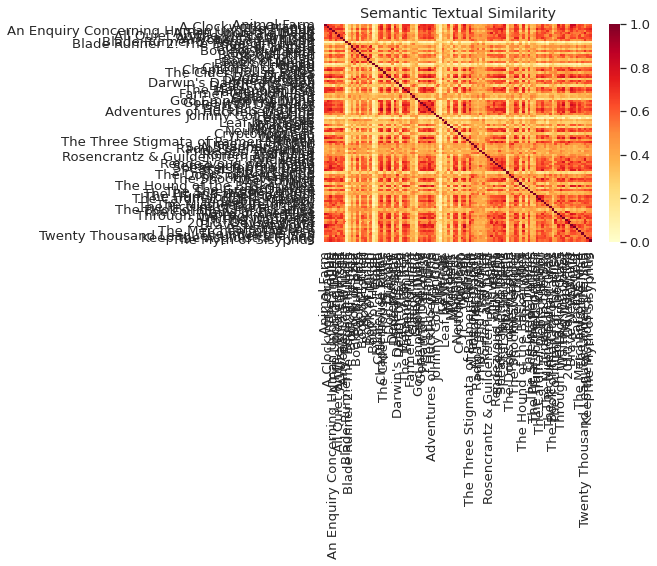

In [48]:
plot_similarity(book_names[:100], embedding_list_tensor[:100], 90)

In [49]:
corr = np.inner(embedding_list_tensor[:100],embedding_list_tensor[:100])

In [50]:
for i in range(corr.shape[0]):
  corr[i][i] = -2

In [51]:
corr.argmax()

2139

In [52]:
corr[corr.argmax()//corr.shape[1]][corr.argmax()%corr.shape[1]]

0.87868124

In [53]:
corr.argmax()//corr.shape[1]

21

In [54]:
corr.argmax()%corr.shape[1]

39

In [55]:
book_names[21]

'Chapterhouse Dune'

In [56]:
list_all_summaries[21]

'situat desper bene gesserit find target honor matr  whose conquest old empir almost complet  matr seek assimil technolog develop method bene gesserit extermin sisterhood  command bene gesserit  mother superior darwi odrad continu develop drastic  secret plan overcom honor matr  bene gesserit also terraform planet chapterhous accommod allimport sandworm  whose nativ planet dune destroy matr  sheeana  charg project  expect sandworm appear soon  honor matr also destroy entir bene tleilax civil  tleilaxu master scytal one kind left aliv  bene gesserit captiv  scytal possess tleilaxu secret ghola product  reluctantli trade sisterhood protect  first ghola produc recentlydeceas militari geniu  mile teg  bene gesserit two prison chapterhous  latest duncan idaho ghola  former honor matr murbella  accept novic despit suspicion intend escap back honor matr  lampada  center bene gesserit educ  destroy honor matr  planet chancellor  reverend mother lucilla  manag escap carri sharedmind million rev

In [ ]:
book_names[39]

'Heretics of Dune'

In [ ]:
list_all_summaries[39]

" Much has changed in the millennium and a half since the death of the God Emperor. Sandworms have reappeared on Arrakis (now called Rakis) and renewed the flow of the all-important spice melange to the galaxy. With Leto's death, a hugely complex economic system built on spice collapsed, resulting in trillions leaving known space in a great Scattering. A new civilization has risen, with three dominant powers: the Ixians, whose no-ships are capable of piloting between the stars and are invisible to outside detection; the Bene Tleilax, who have learned to manufacture spice in their axlotl tanks and have created a new breed of Face Dancers; and the Bene Gesserit, a matriarchal order of subtle political manipulators who possess superhuman abilities. However, people from the Scattering are returning with their own peculiar powers. The most powerful of these forces are the Honored Matres, a violent society of women bred and trained for combat and the sexual control of men. On Rakis, a girl c

In [ ]:
data_df[data_df['summary_cmu']==list_all_summaries[21]]

,wiki_id,title_goog,title_cmu,key,publisher,rating,num_ratings,summary_cmu,summary_goog,genre
76,6630.0,chapterhousedune,Chapterhouse Dune,chapterhousedune,Penguin,4.0,5,The situation is desperate for the Bene Gesse...,"Fifteen thousand years after Leto II's death, ...","{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
77,6630.0,chapterhousedune,Chapterhouse Dune,chapterhousedune,Ace Hardcover,3.0,18,The situation is desperate for the Bene Gesse...,A lavishly bound re-release of a final entry i...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
78,6630.0,chapterhousedune,Chapterhouse Dune,chapterhousedune,Turtleback,3.0,17,The situation is desperate for the Bene Gesse...,"Fifteen thousand years after Leto II's death, ...","{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
79,6630.0,chapterhousedune,Chapterhouse Dune,chapterhousedune,Macmillan,3.0,9,The situation is desperate for the Bene Gesse...,When his wife and children are killed by a ter...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
80,6630.0,chapterhousedune,Chapterhouse Dune,chapterhousedune,Penguin,4.0,276,The situation is desperate for the Bene Gesse...,NOW A MAJOR MOTION PICTURE directed by Denis V...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."


In [ ]:
data_df[data_df['summary_cmu']==list_all_summaries[39]]

,wiki_id,title_goog,title_cmu,key,publisher,rating,num_ratings,summary_cmu,summary_goog,genre
152,13871.0,hereticsofdune,Heretics of Dune,hereticsofdune,Penguin,3.5,19,Much has changed in the millennium and a half...,Book Five in the Magnificent Dune Chroniclesâ€...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
153,13871.0,hereticsofdune,Heretics of Dune,hereticsofdune,Demco Media,3.5,19,Much has changed in the millennium and a half...,Thousands of years after the death of God Empe...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
154,13871.0,hereticsofdune,Heretics of Dune,hereticsofdune,Penguin,4.0,5,Much has changed in the millennium and a half...,"Fifteen thousand years after Leto II's death, ...","{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
155,13871.0,hereticsofdune,Heretics of Dune,hereticsofdune,Macmillan,3.0,9,Much has changed in the millennium and a half...,When his wife and children are killed by a ter...,"{'/m/06n90': 'Science Fiction', '/m/014dfn': '..."
